In [1]:
#ANGLES between DF and BP while running DF in...
#

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from imp import reload
import torch.nn as nn

import sys
sys.path.append("..")
import vnn
import vec_models
import train_models
from scipy.stats import pearsonr
reload(vnn)

<module 'vnn' from '../vnn.py'>

In [2]:
train_loader, test_loader = train_models.load_cifar()
for cifar_data, cifar_labels in train_loader:
    break
cifar_input_conv = vnn.expand_input_conv(cifar_data, 10)
cifar_input_flat = vnn.expand_input(nn.Flatten()(cifar_data), 10)

train_loader, test_loader = train_models.load_mnist()
for mnist_data, mnist_labels in train_loader:
    break
mnist_input_conv = vnn.expand_input_conv(mnist_data, 10)
mnist_input_flat = vnn.expand_input(nn.Flatten()(mnist_data), 10)


Files already downloaded and verified
Files already downloaded and verified


In [3]:
def compute_alignment_angles(model_dir, layers, make_model_fn, input, labels, num_epochs, epoch_step):
    batch_size = len(input)
    num_checkpoints = num_epochs // epoch_step
    
    angles = np.zeros((num_checkpoints, batch_size, len(layers)))
    loss_vals = np.zeros((num_checkpoints, 2))
    acc_vals = np.zeros((num_checkpoints, 2))
    
    epoch_idx = 0
    for epoch in np.arange(0, num_epochs, epoch_step):
        print(epoch)
        checkpoint = torch.load(model_dir + "/epoch_{}.pt".format(epoch))
        model = make_model_fn()
        backward_layers = len(model) - np.array(layers) - 1
        print(backward_layers)
        model.load_state_dict(checkpoint["model_state_dict"])
        
        vnn.zero_grads(model)
        output = model(input)[..., 0]
        
        #plt.hist(output.numpy().flatten())
        #plt.title(model_dir)
        #plt.show()
        
        g_vals = vnn.set_model_grads(model, output, labels, learning_rule="bp", reduction="mean", return_g=True)
        g_vals = [g_vals[i].view(len(g_vals[i]), -1).numpy() for i in backward_layers]
        r_vals = np.array([g.sum(axis=1)/(np.linalg.norm(g, axis=1)*np.sqrt(g.shape[1])) for g in g_vals]).T
        
        angles[epoch_idx] = np.rad2deg(np.arccos(r_vals))
        loss_vals[epoch_idx] = [checkpoint["train_loss"], checkpoint["test_loss"]]
        acc_vals[epoch_idx] = [checkpoint["train_accuracy"], checkpoint["test_accuracy"]]
        epoch_idx += 1
    return angles, acc_vals, loss_vals

base_dir = "/home/davidclark/Projects/VectorizedNets/experiments/models"

angles_1, acc_1, loss_1 = compute_alignment_angles(
    model_dir=base_dir + "/mnist_vec_fc_df_mono",
    layers=[1, 3, 4],
    make_model_fn=lambda: vec_models.make_mnist_vec_fc(False),
    input=mnist_input_flat,
    labels=mnist_labels,
    num_epochs=200,
    epoch_step=10)

angles_2, acc_2, loss_2 = compute_alignment_angles(
    model_dir=base_dir + "/mnist_vec_conv_df_mono",
    layers=[1, 4, 8, 9],
    make_model_fn=lambda: vec_models.make_mnist_vec_conv(False),
    input=mnist_input_conv,
    labels=mnist_labels,
    num_epochs=200,
    epoch_step=10)

angles_3, acc_3, loss_3 = compute_alignment_angles(
    model_dir=base_dir + "/mnist_vec_lc_df_mono",
    layers=[1, 4, 8, 9],
    make_model_fn=lambda: vec_models.make_mnist_vec_lc(False),
    input=mnist_input_conv,
    labels=mnist_labels,
    num_epochs=100,
    epoch_step=10)

angles_4, acc_4, loss_4 = compute_alignment_angles(
    model_dir=base_dir + "/cifar_vec_fc_df_mono",
    layers=[1, 3, 5, 6],
    make_model_fn=lambda: vec_models.make_cifar_vec_fc(False),
    input=cifar_input_flat,
    labels=cifar_labels,
    num_epochs=200,
    epoch_step=10)

angles_5, acc_5, loss_5 = compute_alignment_angles(
    model_dir=base_dir + "/cifar_vec_conv_df_mono",
    layers=[1, 4, 7, 10, 11],
    make_model_fn=lambda: vec_models.make_cifar_vec_conv(False),
    input=cifar_input_conv,
    labels=cifar_labels,
    num_epochs=200,
    epoch_step=10)

angles_6, acc_6, loss_6 = compute_alignment_angles(
    model_dir=base_dir + "/cifar_vec_lc_df_mono",
    layers=[1, 4, 7, 10, 11],
    make_model_fn=lambda: vec_models.make_cifar_vec_lc(False),
    input=cifar_input_conv,
    labels=cifar_labels,
    num_epochs=100,
    epoch_step=10)



0
[3 1 0]
10
[3 1 0]
20
[3 1 0]
30
[3 1 0]
40
[3 1 0]
50
[3 1 0]
60
[3 1 0]
70
[3 1 0]
80
[3 1 0]
90
[3 1 0]
100
[3 1 0]
110
[3 1 0]
120
[3 1 0]
130
[3 1 0]
140
[3 1 0]
150
[3 1 0]
160
[3 1 0]
170
[3 1 0]
180
[3 1 0]
190
[3 1 0]
0
[8 5 1 0]
10
[8 5 1 0]
20
[8 5 1 0]
30
[8 5 1 0]
40
[8 5 1 0]
50
[8 5 1 0]
60
[8 5 1 0]
70
[8 5 1 0]
80
[8 5 1 0]
90
[8 5 1 0]
100
[8 5 1 0]
110
[8 5 1 0]
120
[8 5 1 0]
130
[8 5 1 0]
140
[8 5 1 0]
150
[8 5 1 0]
160
[8 5 1 0]
170
[8 5 1 0]
180
[8 5 1 0]
190
[8 5 1 0]
0
[8 5 1 0]
10
[8 5 1 0]
20
[8 5 1 0]
30
[8 5 1 0]
40
[8 5 1 0]
50
[8 5 1 0]
60
[8 5 1 0]
70
[8 5 1 0]
80
[8 5 1 0]
90
[8 5 1 0]
0
[5 3 1 0]
10
[5 3 1 0]
20
[5 3 1 0]
30
[5 3 1 0]
40
[5 3 1 0]
50
[5 3 1 0]
60
[5 3 1 0]
70
[5 3 1 0]
80
[5 3 1 0]
90
[5 3 1 0]
100
[5 3 1 0]
110
[5 3 1 0]
120
[5 3 1 0]
130
[5 3 1 0]
140
[5 3 1 0]
150
[5 3 1 0]
160
[5 3 1 0]
170
[5 3 1 0]
180
[5 3 1 0]
190
[5 3 1 0]
0
[10  7  4  1  0]
10
[10  7  4  1  0]
20
[10  7  4  1  0]
30
[10  7  4  1  0]
40
[10  7  4  1  0]
50
[1

In [96]:
angles_7, acc_7, loss_7 = compute_alignment_angles(
    model_dir=base_dir + "/mnist_vec_fc_df_mixed",
    layers=[1, 3, 4],
    make_model_fn=lambda: vec_models.make_mnist_vec_fc(False),
    input=mnist_input_flat,
    labels=mnist_labels,
    num_epochs=200,
    epoch_step=10)

angles_8, acc_8, loss_8 = compute_alignment_angles(
    model_dir=base_dir + "/mnist_vec_conv_df_mixed",
    layers=[1, 4, 8, 9],
    make_model_fn=lambda: vec_models.make_mnist_vec_conv(False),
    input=mnist_input_conv,
    labels=mnist_labels,
    num_epochs=200,
    epoch_step=10)

angles_9, acc_9, loss_9 = compute_alignment_angles(
    model_dir=base_dir + "/mnist_vec_lc_df_mixed",
    layers=[1, 4, 8, 9],
    make_model_fn=lambda: vec_models.make_mnist_vec_lc(False),
    input=mnist_input_conv,
    labels=mnist_labels,
    num_epochs=100,
    epoch_step=10)

angles_10, acc_10, loss_10 = compute_alignment_angles(
    model_dir=base_dir + "/cifar_vec_fc_df_mixed",
    layers=[1, 3, 5, 6],
    make_model_fn=lambda: vec_models.make_cifar_vec_fc(False),
    input=cifar_input_flat,
    labels=cifar_labels,
    num_epochs=200,
    epoch_step=10)

angles_11, acc_11, loss_11 = compute_alignment_angles(
    model_dir=base_dir + "/cifar_vec_conv_df_mixed",
    layers=[1, 4, 7, 10, 11],
    make_model_fn=lambda: vec_models.make_cifar_vec_conv(False),
    input=cifar_input_conv,
    labels=cifar_labels,
    num_epochs=200,
    epoch_step=10)

angles_12, acc_12, loss_12 = compute_alignment_angles(
    model_dir=base_dir + "/cifar_vec_lc_df_mixed",
    layers=[1, 4, 7, 10, 11],
    make_model_fn=lambda: vec_models.make_cifar_vec_lc(False),
    input=cifar_input_conv,
    labels=cifar_labels,
    num_epochs=100,
    epoch_step=10)



0
[3 1 0]
10
[3 1 0]
20
[3 1 0]
30
[3 1 0]
40
[3 1 0]
50
[3 1 0]
60
[3 1 0]
70
[3 1 0]
80
[3 1 0]
90
[3 1 0]
100
[3 1 0]
110
[3 1 0]
120
[3 1 0]
130
[3 1 0]
140
[3 1 0]
150
[3 1 0]
160
[3 1 0]
170
[3 1 0]
180
[3 1 0]
190
[3 1 0]
0
[8 5 1 0]
10
[8 5 1 0]
20
[8 5 1 0]
30
[8 5 1 0]
40
[8 5 1 0]
50
[8 5 1 0]
60
[8 5 1 0]
70
[8 5 1 0]
80
[8 5 1 0]
90
[8 5 1 0]
100
[8 5 1 0]
110
[8 5 1 0]
120
[8 5 1 0]
130
[8 5 1 0]
140
[8 5 1 0]
150
[8 5 1 0]
160
[8 5 1 0]
170
[8 5 1 0]
180
[8 5 1 0]
190
[8 5 1 0]
0
[8 5 1 0]
10
[8 5 1 0]
20
[8 5 1 0]
30
[8 5 1 0]
40
[8 5 1 0]
50
[8 5 1 0]
60
[8 5 1 0]
70
[8 5 1 0]
80
[8 5 1 0]
90
[8 5 1 0]
0
[5 3 1 0]
10
[5 3 1 0]
20
[5 3 1 0]
30
[5 3 1 0]
40
[5 3 1 0]
50
[5 3 1 0]
60
[5 3 1 0]
70
[5 3 1 0]
80
[5 3 1 0]
90
[5 3 1 0]
100
[5 3 1 0]
110
[5 3 1 0]
120
[5 3 1 0]
130
[5 3 1 0]
140
[5 3 1 0]
150
[5 3 1 0]
160
[5 3 1 0]
170
[5 3 1 0]
180
[5 3 1 0]
190
[5 3 1 0]
0
[10  7  4  1  0]
10
[10  7  4  1  0]
20
[10  7  4  1  0]
30
[10  7  4  1  0]
40
[10  7  4  1  0]
50
[1

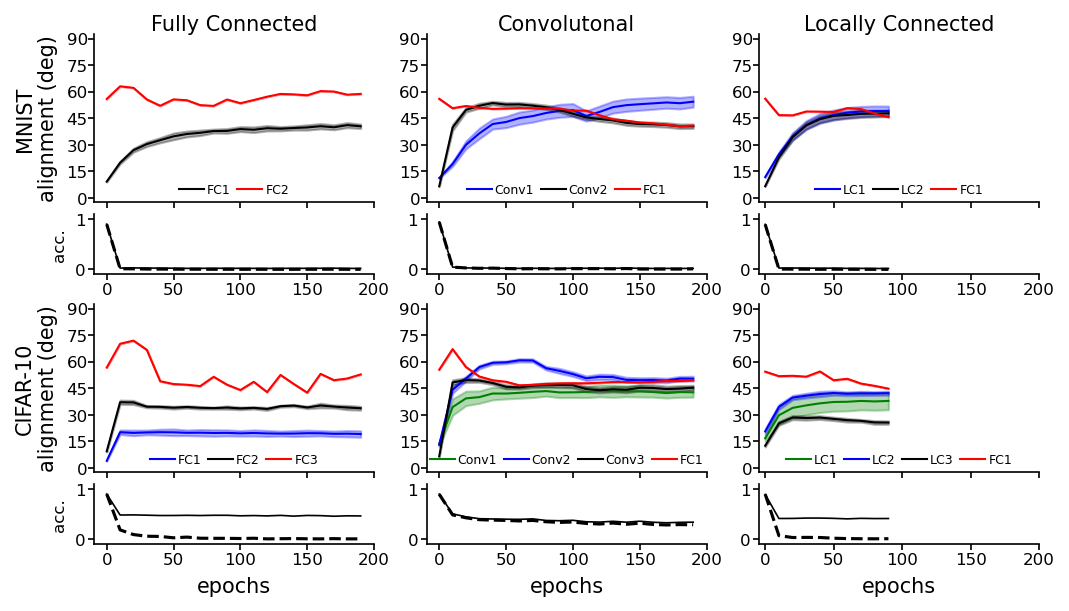

In [98]:
colors = ["red", "black", "blue", "green"]

def make_axes():
    fig = plt.figure(figsize=(7, 4), dpi=150)
    hpad = 0.05
    hspace = 0.05
    vpad = 0.05
    vspace = 0.05
    vmid = 0.020

    h_sub = 0.1
    w = (1 - 2*hspace - 2*hpad)/3.
    h = (1 - 2*vspace - 2*vpad - 2*h_sub - 2*vmid)/2.

    ax1 = fig.add_axes((hpad, vpad + h_sub + h + hspace + h_sub + 2*vmid, w, h))
    ax2 = fig.add_axes((hpad + w + hspace, vpad + h_sub + h + hspace + h_sub + 2*vmid, w, h))
    ax3 = fig.add_axes((hpad + 2*w + 2*hspace, vpad + h_sub + h + hspace + h_sub + 2*vmid, w, h))

    ax1sub = fig.add_axes((hpad, vpad + h_sub + h + hspace + vmid, w, h_sub))
    ax2sub = fig.add_axes((hpad + w + hspace, vpad + h_sub + h + hspace + vmid, w, h_sub))
    ax3sub = fig.add_axes((hpad + 2*w + 2*hspace, vpad + h_sub + h + hspace + vmid, w, h_sub))

    ax4 = fig.add_axes((hpad, vpad + h_sub + vmid, w, h))
    ax5 = fig.add_axes((hpad + w + hspace, vpad + h_sub + vmid, w, h))
    ax6 = fig.add_axes((hpad + 2*w + 2*hspace, vpad + h_sub + vmid, w, h))

    ax4sub = fig.add_axes((hpad, vpad, w, h_sub))
    ax5sub = fig.add_axes((hpad + w + hspace, vpad, w, h_sub))
    ax6sub = fig.add_axes((hpad + 2*w + 2*hspace, vpad, w, h_sub))

    axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    axes_sub = [ax1sub, ax2sub, ax3sub, ax4sub, ax5sub, ax6sub]

    for ax in axes + axes_sub:
        ax.set_xticks([])
        ax.set_yticks([])

    #fig.set_facecolor('red')
    
    return axes, axes_sub

def plot_angles(ax, angles, title=None, labels=None):
    n = angles.shape[-1]
    for i in range(n - 1):
        x = angles[:, :, i]
        mu = x.mean(axis=1)
        std = x.std(axis=1)
        c = colors[n - 2 - i]
        ax.plot(mu, lw=1, color=c, label=labels[i] if labels is not None else str(i))
        ax.fill_between(np.arange(len(x)), mu-std, mu+std, alpha=0.3, color=c)
    #ax.axhline(45., color="black")
    ax.set_title(title, pad=0, fontsize=10)
    ax.set_ylim(-2.5, 92.5)
    ax.set_yticks([0, 15, 30, 45, 60, 75, 90])
    ax.tick_params(size=3, labelsize=8, pad=0)
    ax.legend(ncol=n-1, fontsize=6, loc="lower center", frameon=False, borderpad=0, columnspacing=0.5, handletextpad=0.25)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
def plot_err(ax, err):
    ax.plot(err[:, 0], lw=1.5, ls="--", color="black")
    ax.plot(err[:, 1], lw=.8, ls="-", color="black")
    ax.set_ylim(-0.1, 1.1)
    ax.set_yticks([0, 1])
    ax.tick_params(size=3, labelsize=8, pad=0)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
def format_axes(axes, axes_sub):
    for ax in axes_sub:
        ax.set_xticks([0, 5, 10, 15, 20])
        ax.set_xticklabels([0, 50, 100, 150, 200])
        ax.tick_params(size=3, labelsize=8, pad=1)
    for ax in axes:
        ax.set_xticks([0, 5, 10, 15, 20])
        ax.set_xticklabels([])
        #ax.tick_params(size=3, labelsize=8, pad=1)

    axes[0].set_ylabel("MNIST\nalignment (deg)")
    axes[3].set_ylabel("CIFAR-10\nalignment (deg)")
    for ax in axes_sub[3:]:
        ax.set_xlabel("epochs")
    axes_sub[0].set_ylabel("acc.", fontsize=8)
    axes_sub[3].set_ylabel("acc.", fontsize=8)

axes, axes_sub = make_axes()
plot_angles(axes[0], angles_1, "Fully Connected", labels=["FC1", "FC2"])
plot_angles(axes[1], angles_2, "Convolutonal", labels=["Conv1", "Conv2", "FC1"])
plot_angles(axes[2], angles_3, "Locally Connected", labels=["LC1", "LC2", "FC1"])
plot_angles(axes[3], angles_4, labels=["FC1", "FC2", "FC3"])
plot_angles(axes[4], angles_5, labels=["Conv1", "Conv2", "Conv3", "FC1"])
plot_angles(axes[5], angles_6, labels=["LC1", "LC2", "LC3", "FC1"])

plot_err(axes_sub[0], 1-acc_1)
plot_err(axes_sub[1], 1-acc_2)
plot_err(axes_sub[2], 1-acc_3)
plot_err(axes_sub[3], 1-acc_4)
plot_err(axes_sub[4], 1-acc_5)
plot_err(axes_sub[5], 1-acc_6)

format_axes(axes, axes_sub)


    

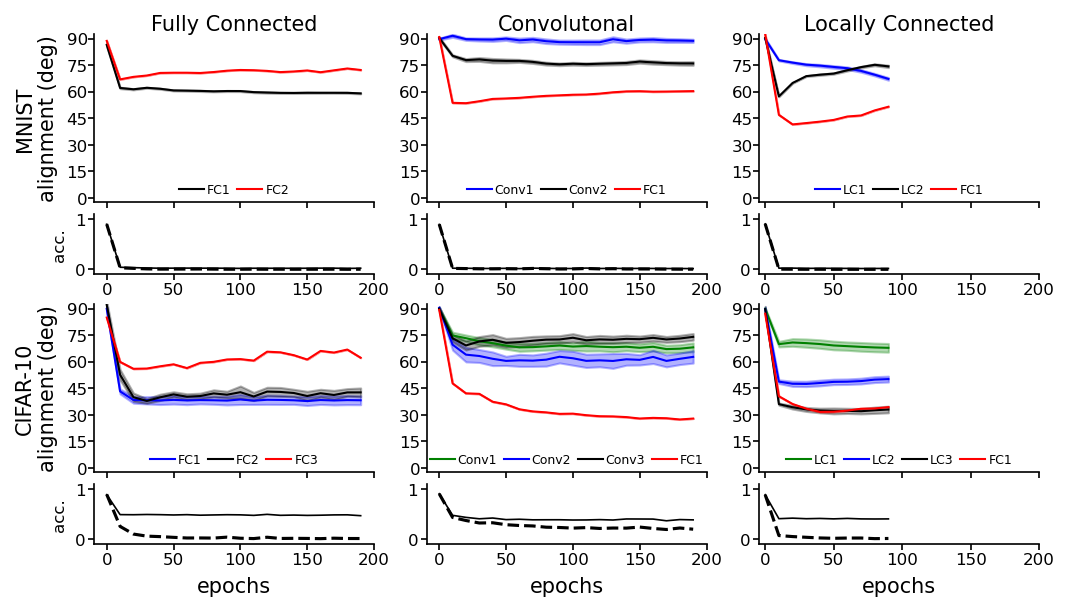

In [99]:
axes, axes_sub = make_axes()
plot_angles(axes[0], angles_7, "Fully Connected", labels=["FC1", "FC2"])
plot_angles(axes[1], angles_8, "Convolutonal", labels=["Conv1", "Conv2", "FC1"])
plot_angles(axes[2], angles_9, "Locally Connected", labels=["LC1", "LC2", "FC1"])
plot_angles(axes[3], angles_10, labels=["FC1", "FC2", "FC3"])
plot_angles(axes[4], angles_11, labels=["Conv1", "Conv2", "Conv3", "FC1"])
plot_angles(axes[5], angles_12, labels=["LC1", "LC2", "LC3", "FC1"])

plot_err(axes_sub[0], 1-acc_7)
plot_err(axes_sub[1], 1-acc_8)
plot_err(axes_sub[2], 1-acc_9)
plot_err(axes_sub[3], 1-acc_10)
plot_err(axes_sub[4], 1-acc_11)
plot_err(axes_sub[5], 1-acc_12)

format_axes(axes, axes_sub)



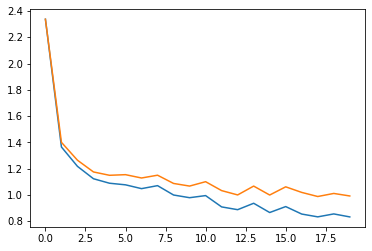

In [82]:
#3 architectures, 2 datasets, mono+mixed
plt.plot(loss_5)


In [64]:
for i in range(len(grads_df)):
    g1 = grads_bp[i].numpy().flatten()
    g2 = grads_df[i].numpy().flatten()
    dp = g1.dot(g2)/(np.linalg.norm(g1)*np.linalg.norm(g2))
    dp = np.minimum(dp, 1.0)
    angle_deg = np.rad2deg(np.arccos(dp))
    print(angle_deg)

5.180810356151042
9.608566043947114
56.627142653729436
0.0


In [68]:
checkpoint.keys()

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'train_loss', 'train_accuracy', 'test_loss', 'test_accuracy', 'flatten', 'vectorized', 'learning_rule', 'device'])

In [69]:
np.arange(0, 101, 10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])